In [1]:
# Part 1 - Building the CNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(128, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
# 32 feature detector(filters) with 3 rows and 3 columns (3 X 3 dimension) to create a convolutional layers with 32 feature maps
# working with cpu go for 32 instead of 64.
# to convert all our input image into all same single format with fixed size.
# 3d array for coloured and 2D for B&W
# 3D array composed of 3 channels, each channel corresponds to one colour (Blue, Green & Red and each channel corresponds to one 2D array that contains the pixels of our images.
# input_shape(64, 64, 3) for tensor flow backened corresponds to  3 channels for RBG (1 if B&W) with 256 X 256 are the dimensions of the 2D array.
# for theono backened use (3, 64, 64)
# activation = 'relu', rectifier function for nonlinearity

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer to improve the accuracy of the test set. 
classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a third convolutional layer to improve the accuracy of the test set. 
classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a fourth convolutional layer to improve the accuracy of the test set. 
classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(activation = 'relu', units = 128))
classifier.add(Dense(activation = 'sigmoid', units = 1))


# Compiling the CNN
classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Part 2 - Fitting the CNN to the images
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')
batch_size = 32
classifier_history = classifier.fit_generator(training_set,
                         steps_per_epoch = 8000/batch_size,
                         epochs = 50,
                         validation_data = test_set,
                         validation_steps = 2000/batch_size)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
250/250 [==============================] - 523s 2s/step - loss: 0.6914 - acc: 0.5354 - val_loss: 0.6532 - val_acc: 0.6035
Epoch 2/50
250/250 [==============================] - 517s 2s/step - loss: 0.6510 - acc: 0.6331 - val_loss: 0.5861 - val_acc: 0.7060
Epoch 3/50
250/250 [==============================] - 503s 2s/step - loss: 0.6035 - acc: 0.6723 - val_loss: 0.5512 - val_acc: 0.7255
Epoch 4/50
250/250 [==============================] - 507s 2s/step - loss: 0.5733 - acc: 0.7046 - val_loss: 0.5516 - val_acc: 0.7195
Epoch 5/50
250/250 [==============================] - 513s 2s/step - loss: 0.5469 - acc: 0.7293 - val_loss: 0.5386 - val_acc: 0.7335
Epoch 6/50
250/250 [==============================] - 511s 2s/step - loss: 0.5214 - acc: 0.7460 - val_loss: 0.5056 - val_acc: 0.751

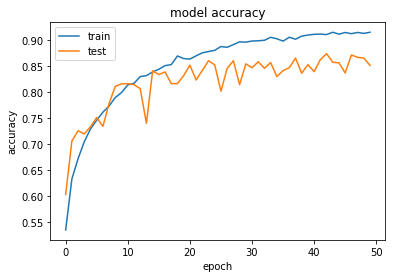

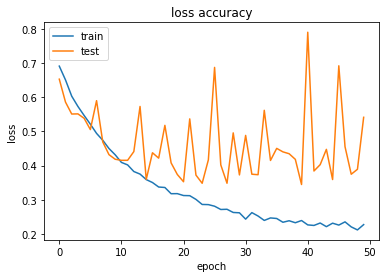

The model class indices are: {'cats': 0, 'dogs': 1}


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(classifier_history.history['acc'])
plt.plot(classifier_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 
plt.plot(classifier_history.history['loss'])
plt.plot(classifier_history.history['val_loss'])
plt.title('loss accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
print("The model class indices are:", training_set.class_indices)

In [3]:
# Part 3 - Making new predictions
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
prediction

'dog'

In [5]:
# Part 3 - Making new predictions
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_2.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
prediction

'cat'

In [6]:
classifier_history.history['acc']

[0.535375,
 0.633125,
 0.67225,
 0.704625,
 0.72925,
 0.746,
 0.76125,
 0.773375,
 0.7895,
 0.799,
 0.813625,
 0.816625,
 0.8295,
 0.831375,
 0.8385,
 0.843625,
 0.8505,
 0.8525,
 0.869125,
 0.864125,
 0.863125,
 0.869375,
 0.875125,
 0.877625,
 0.879875,
 0.88725,
 0.88575,
 0.890875,
 0.89625,
 0.895625,
 0.89775,
 0.89825,
 0.89925,
 0.904875,
 0.902125,
 0.897625,
 0.905,
 0.90125,
 0.907125,
 0.90925,
 0.910625,
 0.911125,
 0.910125,
 0.914625,
 0.911,
 0.914125,
 0.911875,
 0.91425,
 0.912375,
 0.914625]

In [7]:
classifier_history.history['val_acc']

[0.6035,
 0.706,
 0.7255,
 0.7195,
 0.7335,
 0.751,
 0.734,
 0.7785,
 0.811,
 0.8155,
 0.816,
 0.814,
 0.8065,
 0.74,
 0.8405,
 0.8335,
 0.8385,
 0.816,
 0.816,
 0.8315,
 0.8515,
 0.823,
 0.8415,
 0.86,
 0.852,
 0.8015,
 0.8455,
 0.86,
 0.814,
 0.854,
 0.8465,
 0.858,
 0.8455,
 0.8565,
 0.8295,
 0.841,
 0.8465,
 0.865,
 0.836,
 0.8525,
 0.839,
 0.862,
 0.8735,
 0.857,
 0.856,
 0.8365,
 0.871,
 0.8665,
 0.865,
 0.851]